Uploading folder into colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ml-100k.zip to ml-100k.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("ml-100k.zip", 'r') as zip_ref:
    zip_ref.extractall("ml-100k")

# Check contents
os.listdir("ml-100k")

['ml-100k']

In [ ]:
cd ml-100k

/content/ml-100k


In [ ]:
os.listdir("ml-100k")

['u5.test',
 'u3.base',
 'u3.test',
 'allbut.pl',
 'u4.base',
 'u.user',
 'ub.test',
 'u.occupation',
 'ub.base',
 'u2.base',
 'u.item',
 'u1.base',
 'ua.test',
 'ua.base',
 'u2.test',
 'u1.test',
 'u.genre',
 'u.info',
 'u.data',
 'u4.test',
 'README',
 'u5.base',
 'mku.sh']

Initial inspection of data files

In [ ]:
import pandas as pd
import os

# Replace 'your_file.csv' with the actual file name from the ml-100k directory
# For example:
file_path = "ml-100k/u.data"  # or u.item, u.user, etc.
file_ext = os.path.splitext(file_path)[1]

# The u.data file is a tab-separated file, not a CSV.
# We need to use read_csv with a delimiter to handle it.
if file_ext == ".data":  # Add a condition for '.data' files
    df = pd.read_csv(file_path, delimiter='\t', header=None) # Specify tab delimiter and no header
# You likely won't need to handle other file types for this dataset, but keep these for future flexibility
elif file_ext == ".csv":
    df = pd.read_csv(file_path)
elif file_ext == ".xlsx":
    df = pd.read_excel(file_path)
elif file_ext == ".json":
    df = pd.read_json(file_path)
else:
    raise ValueError("Unsupported file format")

In [ ]:
print("Column Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

Column Names: [0, 1, 2, 3]

Data Types:
 0    int64
1    int64
2    int64
3    int64
dtype: object


In [ ]:
print(df.head())        # First 5 rows
print(df.tail())        # Last 5 rows
print(df.sample(5))     # Random 5 rows

     0    1  2          3
0  196  242  3  881250949
1  186  302  3  891717742
2   22  377  1  878887116
3  244   51  2  880606923
4  166  346  1  886397596
         0     1  2          3
99995  880   476  3  880175444
99996  716   204  5  879795543
99997  276  1090  1  874795795
99998   13   225  2  882399156
99999   12   203  3  879959583
         0     1  2          3
9293   119   451  5  891286958
71396  653   176  3  878854145
11705  286  1230  1  877535157
85489  903    61  4  891033302
48934  591   393  4  891031644


In [ ]:
print(df.isnull().sum())     # Count of missing values per column
print(df.info())             # Overall summary with nulls

0    0
1    0
2    0
3    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       100000 non-null  int64
 1   1       100000 non-null  int64
 2   2       100000 non-null  int64
 3   3       100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


Data Overview Analysis

Basic statistics computation

In [ ]:
import pandas as pd
import os

# Replace 'your_file.csv' with the actual file name from the ml-100k directory
# For example:
file_path = "ml-100k/u.data"  # or u.item, u.user, etc.
file_ext = os.path.splitext(file_path)[1]

# The u.data file is a tab-separated file, not a CSV.
# We need to use read_csv with a delimiter to handle it.
if file_ext == ".data":  # Add a condition for '.data' files
    df = pd.read_csv(file_path, delimiter='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp']) # Specify tab delimiter, no header and column names
# You likely won't need to handle other file types for this dataset, but keep these for future flexibility
elif file_ext == ".csv":
    df = pd.read_csv(file_path)
elif file_ext == ".xlsx":
    df = pd.read_excel(file_path)
elif file_ext == ".json":
    df = pd.read_json(file_path)
else:
    raise ValueError("Unsupported file format")

In [ ]:
rating_min = df['rating'].min()
rating_max = df['rating'].max()
rating_mean = df['rating'].mean()
rating_median = df['rating'].median()
rating_counts = df['rating'].value_counts().sort_index()

print(f"Rating min: {rating_min}")
print(f"Rating max: {rating_max}")
print(f"Rating mean: {rating_mean:.2f}")
print(f"Rating median: {rating_median}")
print("\nRating Distribution:\n", rating_counts)

Rating min: 1
Rating max: 5
Rating mean: 3.53
Rating median: 4.0

Rating Distribution:
 rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64


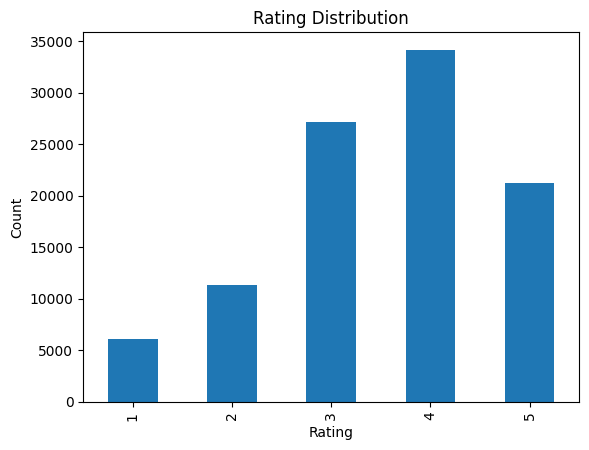

In [ ]:
import matplotlib.pyplot as plt

rating_counts.plot(kind='bar')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # If it's in Unix format
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.to_period('M')

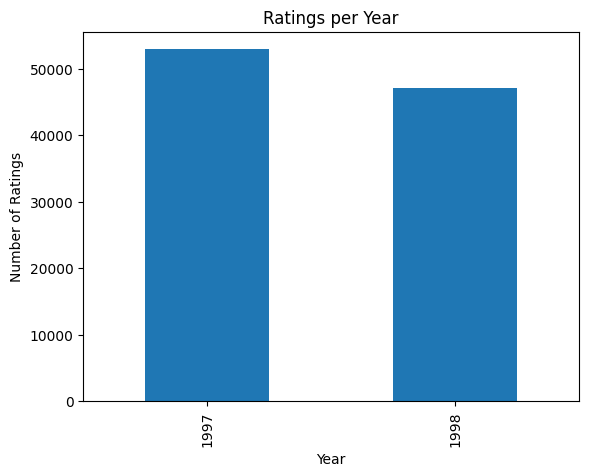

In [ ]:
ratings_per_year = df['year'].value_counts().sort_index()
ratings_per_year.plot(kind='bar')
plt.title("Ratings per Year")
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.show()

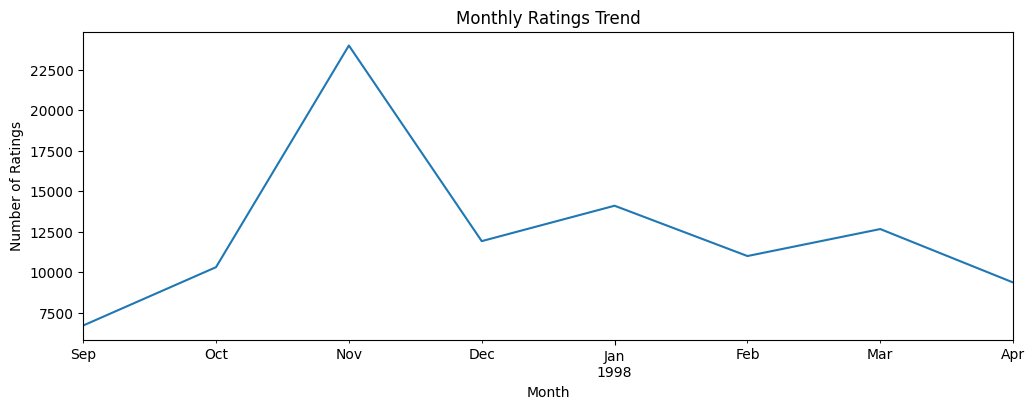

In [ ]:
monthly_counts = df['month'].value_counts().sort_index()
monthly_counts.plot(kind='line', figsize=(12, 4))
plt.title("Monthly Ratings Trend")
plt.xlabel("Month")
plt.ylabel("Number of Ratings")
plt.show()

Data quality assessment

In [ ]:
# Total missing values per column
missing_values = df.isnull().sum()

# Percentage of missing values
missing_percentage = (df.isnull().mean() * 100).round(2)

# Combine for clearer output
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df)

           Missing Values  Percentage
user_id                 0         0.0
movie_id                0         0.0
rating                  0         0.0
timestamp               0         0.0
year                    0         0.0
month                   0         0.0


count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


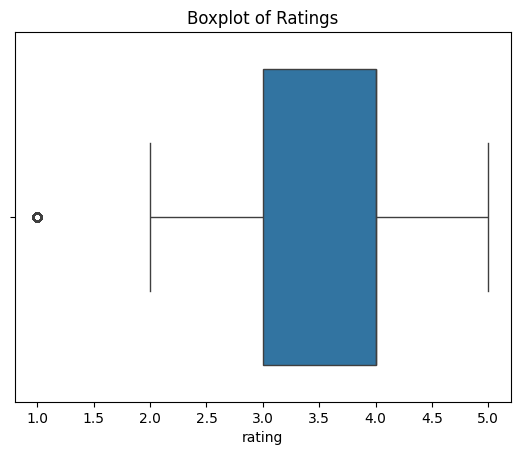

Number of outliers: 6110


In [ ]:
import seaborn as sns # imports seaborn library
import matplotlib.pyplot as plt

# Check unique values and boundaries
print(df['rating'].describe())

# Boxplot for visualizing rating outliers
sns.boxplot(x=df['rating'])
plt.title("Boxplot of Ratings")
plt.show()

# Optional: Define and filter outliers manually
Q1 = df['rating'].quantile(0.25)
Q3 = df['rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['rating'] < lower_bound) | (df['rating'] > upper_bound)]
print(f"Number of outliers: {outliers.shape[0]}")

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # adjust if already datetime
df['date'] = df['timestamp'].dt.date

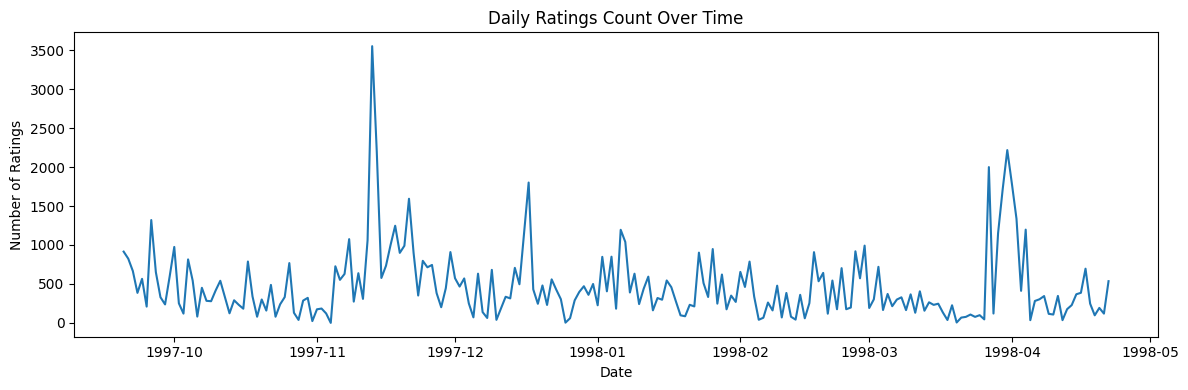

In [ ]:
daily_ratings = df.groupby('date').size()

plt.figure(figsize=(12, 4))
daily_ratings.plot()
plt.title("Daily Ratings Count Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Ratings")
plt.tight_layout()
plt.show()

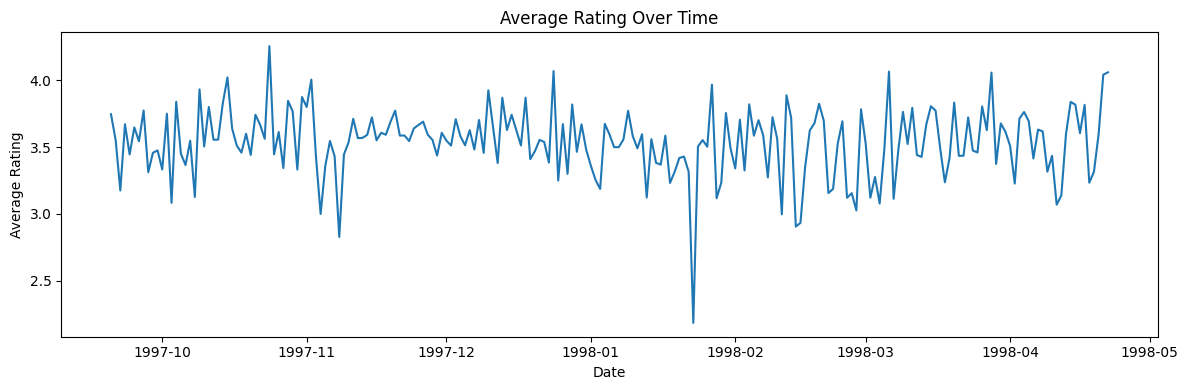

In [ ]:
daily_mean = df.groupby('date')['rating'].mean()

plt.figure(figsize=(12, 4))
daily_mean.plot()
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

Key Visualizations to Create


Rating Distribution

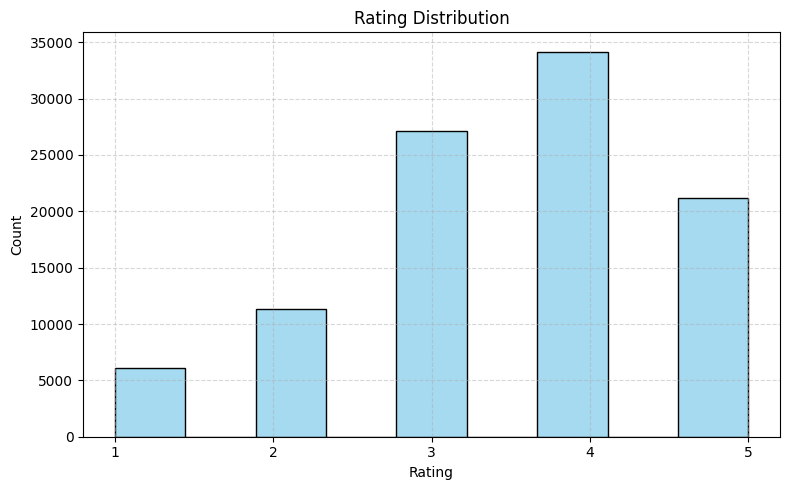

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=9, kde=False, color='skyblue', edgecolor='black')
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(sorted(df['rating'].unique()))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')  # Skip unit='s' if already datetime
df['date'] = df['timestamp'].dt.to_period('M').dt.to_timestamp()

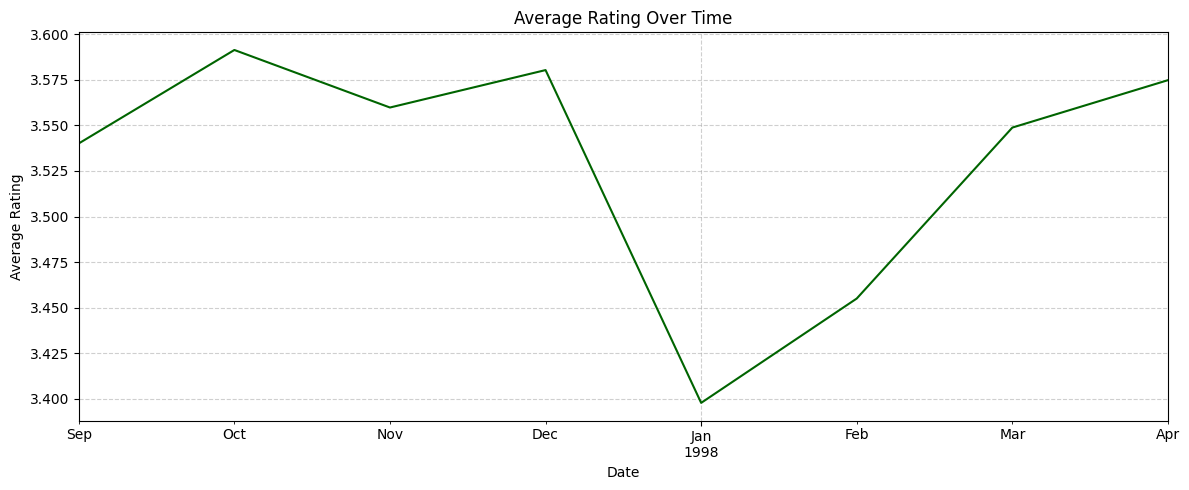

In [ ]:
avg_rating_by_month = df.groupby('date')['rating'].mean()

plt.figure(figsize=(12, 5))
avg_rating_by_month.plot(color='darkgreen')
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

User Activity Analysis

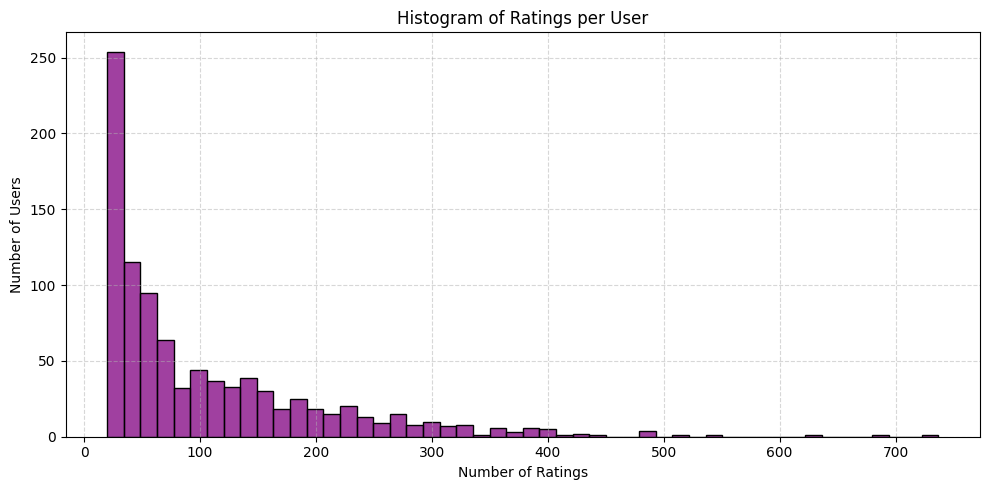

In [ ]:
user_rating_counts = df['user_id'].value_counts()

plt.figure(figsize=(10, 5))
sns.histplot(user_rating_counts, bins=50, color='purple', edgecolor='black')
plt.title("Histogram of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
power_users = user_rating_counts[user_rating_counts > 500]
occasional_users = user_rating_counts[user_rating_counts <= 50]

print(f"Number of Power Users (>500 ratings): {power_users.count()}")
print(f"Number of Occasional Users (<=50 ratings): {occasional_users.count()}")

Number of Power Users (>500 ratings): 5
Number of Occasional Users (<=50 ratings): 380


In [ ]:
print(user_rating_counts.describe())

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: count, dtype: float64


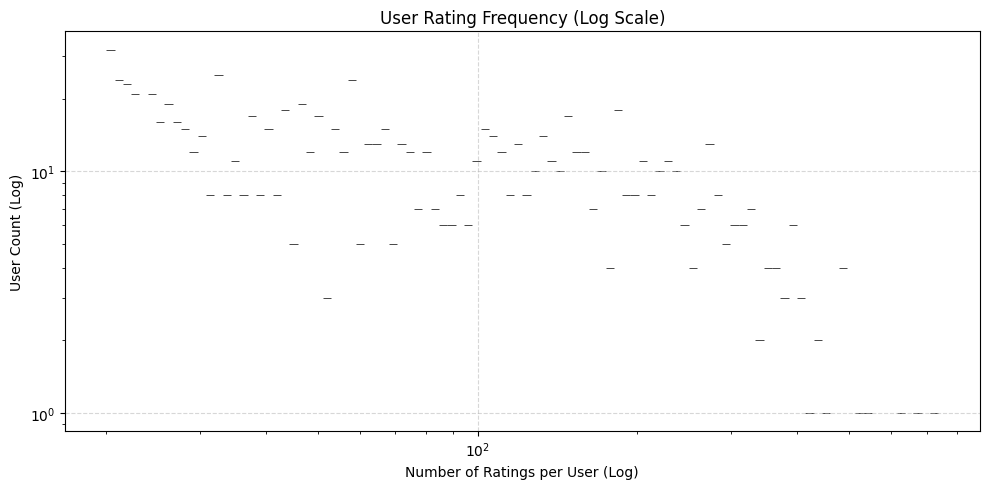

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(user_rating_counts, bins=100, log_scale=(True, True), color='orange')
plt.title("User Rating Frequency (Log Scale)")
plt.xlabel("Number of Ratings per User (Log)")
plt.ylabel("User Count (Log)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Movie Popularity Analysis

<ipython-input-28-af95cb0c9c2e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')


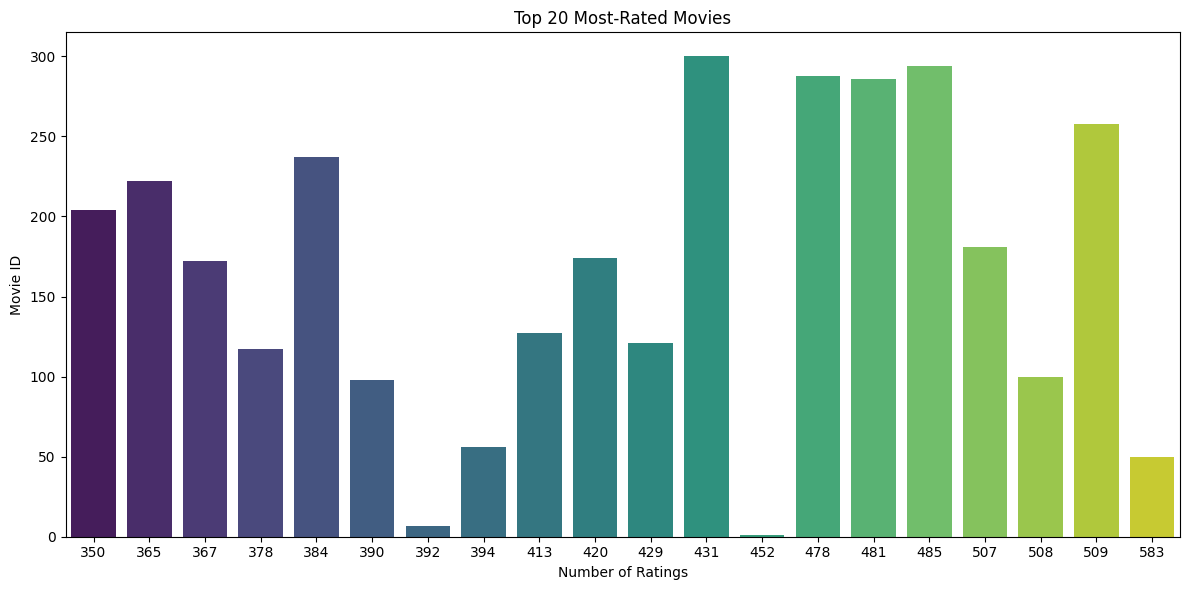

In [ ]:
# Top 20 most-rated movies
top_movies = df['movie_id'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')
plt.title("Top 20 Most-Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie ID")
plt.tight_layout()
plt.show()

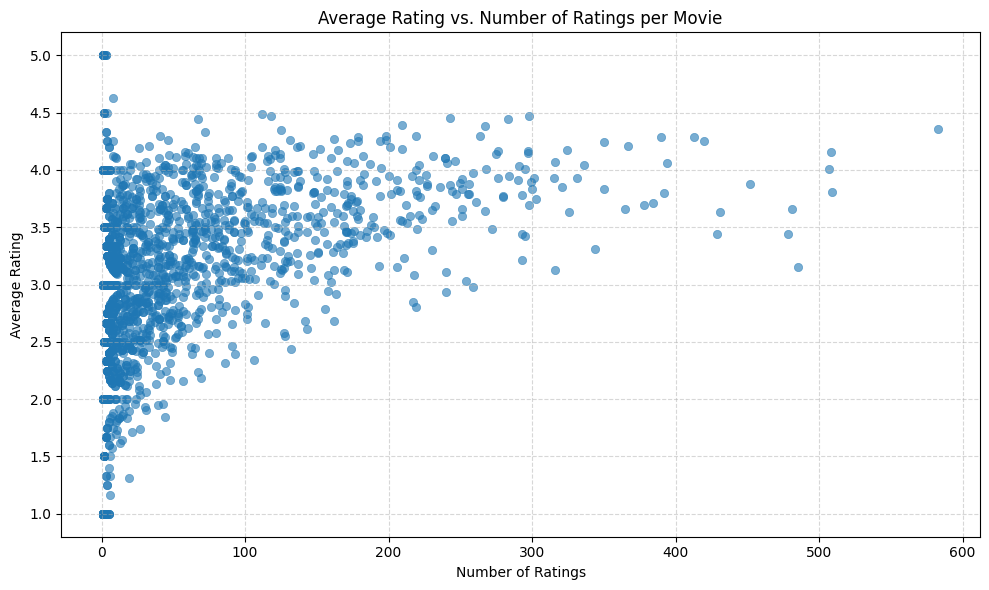

In [ ]:
# Group by movie_id
movie_stats = df.groupby('movie_id')['rating'].agg(['mean', 'count'])
movie_stats.columns = ['avg_rating', 'rating_count']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=movie_stats,
    x='rating_count',
    y='avg_rating',
    alpha=0.6,
    edgecolor=None
)
plt.title("Average Rating vs. Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Example thresholds (customizable)
blockbusters = movie_stats[(movie_stats['rating_count'] > 500) & (movie_stats['avg_rating'] > 4.0)]
niche_favorites = movie_stats[(movie_stats['rating_count'] < 100) & (movie_stats['avg_rating'] > 4.5)]

print(f"Blockbusters found: {blockbusters.shape[0]}")
print(f"Niche favorites found: {niche_favorites.shape[0]}")

Blockbusters found: 3
Niche favorites found: 11


Genre Analysis

In [ ]:
# Load metadata
movies = pd.read_csv("ml-100k/u.item", sep="|", encoding='latin-1', header=None)  # Assuming u.item contains movie details
movies = movies[[0, 1]]  # Select movie_id and movie title
movies.columns = ['movie_id', 'movie_title']

# Merge with your existing DataFrame
df = df.merge(movies, on="movie_id")

<ipython-input-32-970543772b3e>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating_stats.values, y=genre_rating_stats.index, palette="coolwarm")


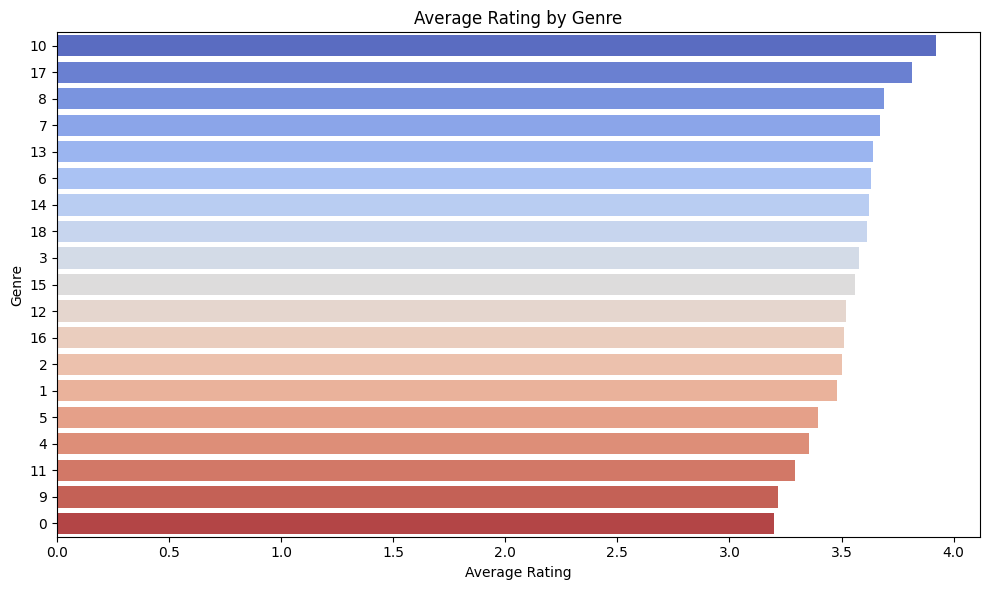

In [ ]:
# Load metadata
movies = pd.read_csv("ml-100k/u.item", sep="|", encoding='latin-1', header=None)  # Assuming u.item contains movie details

# Extract genres (columns 5-24) and convert to a list of genres
movies['genres'] = movies.iloc[:, 5:24].apply(lambda x: '|'.join([str(i) for i, val in enumerate(x) if val == 1]), axis=1)
movies = movies[[0, 'genres']]  # Select movie_id and genres list only
movies.columns = ['movie_id', 'genres']  # Rename columns

# Merge with your existing DataFrame, using only the 'movie_id' column from 'movies'
df = df.merge(movies, on="movie_id")

# Split genres into rows
df_exploded = df.copy()  # Create a fresh copy of the DataFrame containing the `genres` column
df_exploded['genres'] = df_exploded['genres'].str.split('|')  # Now works on string data
df_exploded = df_exploded.explode('genres')

# Group by genre
genre_rating_stats = df_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_rating_stats.values, y=genre_rating_stats.index, palette="coolwarm")
plt.title("Average Rating by Genre")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

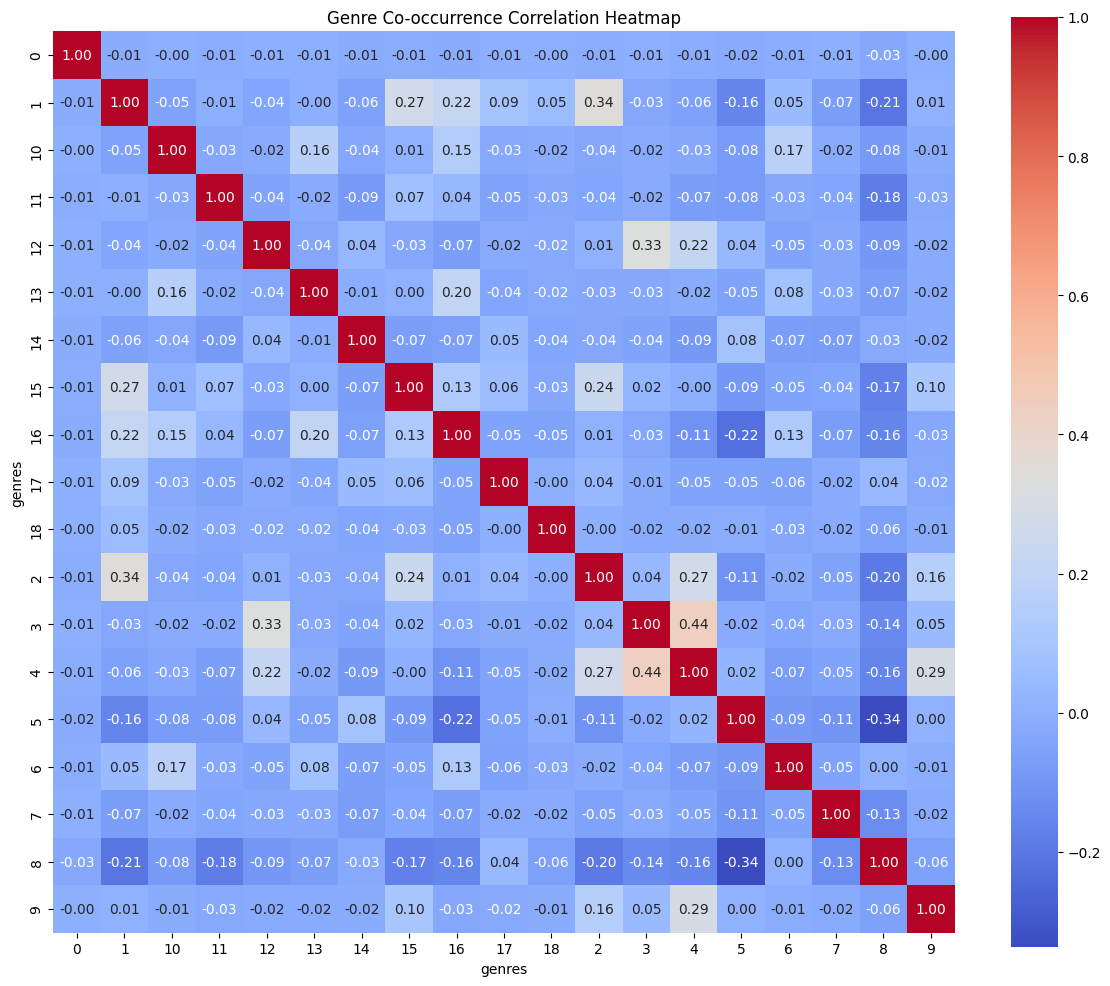

In [ ]:
# Create one-hot encoding of genres
genre_matrix = movies.copy()
genre_matrix['genres'] = genre_matrix['genres'].str.split('|')
genre_matrix = genre_matrix.explode('genres')
genre_matrix['value'] = 1

genre_pivot = genre_matrix.pivot_table(index='movie_id', columns='genres', values='value', fill_value=0)

# Compute correlations
genre_corr = genre_pivot.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(genre_corr, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title("Genre Co-occurrence Correlation Heatmap")
plt.tight_layout()
plt.show()

<ipython-input-34-7f59b836cd61>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')


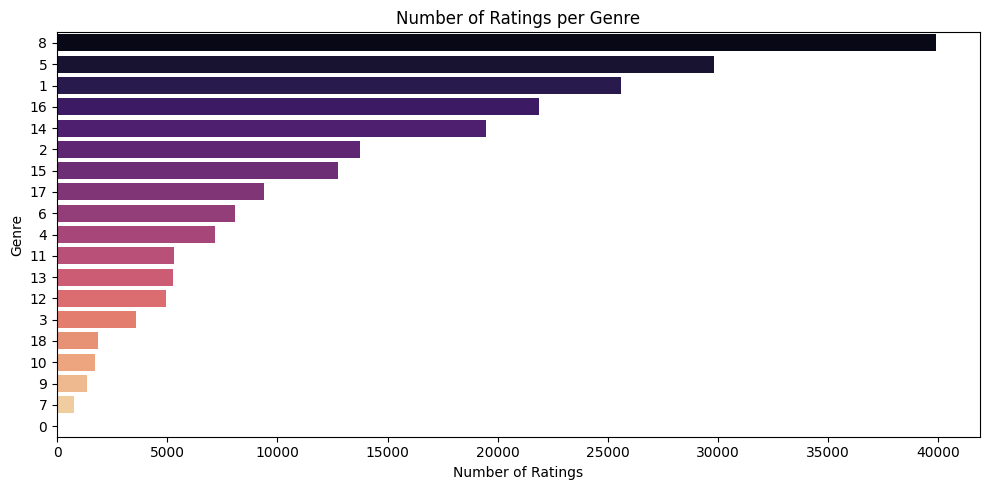

In [ ]:
# Number of ratings per genre
genre_counts = df_exploded['genres'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')
plt.title("Number of Ratings per Genre")
plt.xlabel("Number of Ratings")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

Temporal Patterns

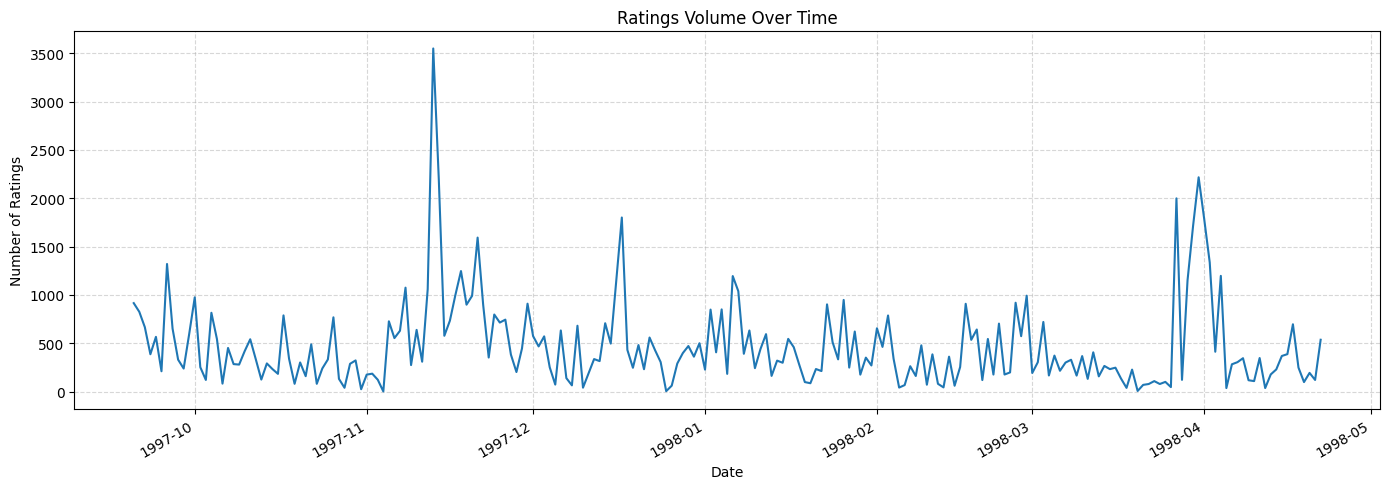

In [ ]:
# Ensure timestamp is datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['timestamp'].dt.to_period('D').dt.to_timestamp()

# Count ratings per day
ratings_per_day = df.groupby('date').size()

plt.figure(figsize=(14, 5))
ratings_per_day.plot()
plt.title("Ratings Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Ratings")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-36-14cb4f713a4d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_activity.index, y=weekday_activity.values, palette='Set2')


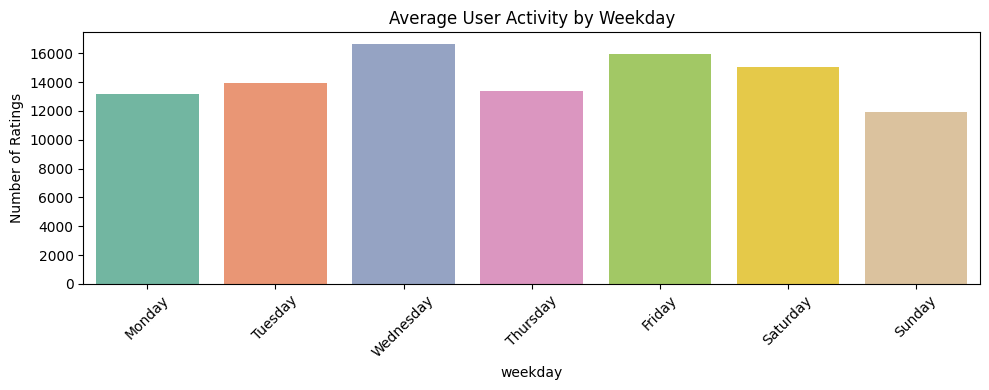

In [ ]:
# Add weekday and month columns
df['month'] = df['timestamp'].dt.month
df['weekday'] = df['timestamp'].dt.day_name()

# Average ratings per weekday
weekday_activity = df.groupby('weekday').size().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

plt.figure(figsize=(10, 4))
sns.barplot(x=weekday_activity.index, y=weekday_activity.values, palette='Set2')
plt.title("Average User Activity by Weekday")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

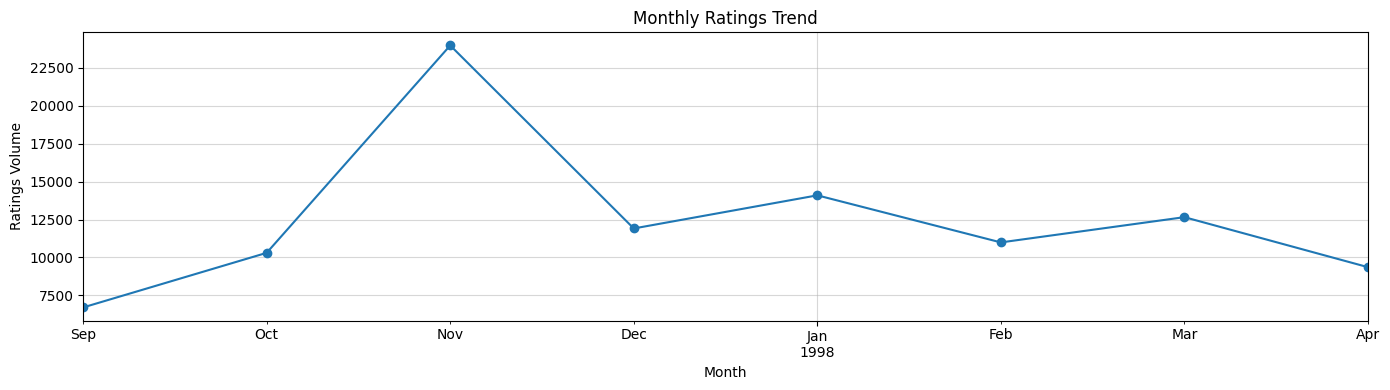

In [ ]:
monthly_activity = df.groupby(df['timestamp'].dt.to_period('M')).size()

plt.figure(figsize=(14, 4))
monthly_activity.plot(marker='o')
plt.title("Monthly Ratings Trend")
plt.xlabel("Month")
plt.ylabel("Ratings Volume")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

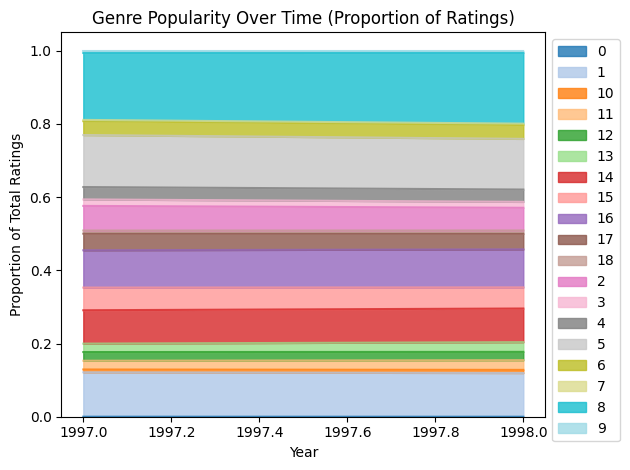

In [ ]:
# Already exploded earlier: df_exploded
df_exploded['year'] = df_exploded['timestamp'].dt.year

# Count of ratings per genre per year
genre_yearly = df_exploded.groupby(['year', 'genres']).size().unstack().fillna(0)

# Optional: Normalize for comparison
genre_yearly_pct = genre_yearly.div(genre_yearly.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(14, 6))
genre_yearly_pct.plot.area(colormap='tab20', alpha=0.8)
plt.title("Genre Popularity Over Time (Proportion of Ratings)")
plt.xlabel("Year")
plt.ylabel("Proportion of Total Ratings")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


EDA Assignment Deliverables

In [ ]:
sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
if not os.path.exists("ml-100k/u.data"):  # Check for u.data in ml-100k
    raise FileNotFoundError("u.data not found in the ml-100k directory.")
else:
    ratings = pd.read_csv("ml-100k/u.data", delimiter='\t', header=None, names=['user_id', 'movie_id', 'rating', 'timestamp'])

# If you also need the movie details:
if not os.path.exists("ml-100k/u.item"):
    raise FileNotFoundError("u.item not found in the ml-100k directory.")
else:
    movies = pd.read_csv("ml-100k/u.item", sep="|", encoding='latin-1', header=None)
    movies = movies[[0, 1]]  # Select movie_id and movie title
    movies.columns = ['movie_id', 'movie_title']